In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import os
import string

import nltk

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Load data
books_data = pd.read_csv(r"/content/drive/MyDrive/SC4021/pre_processed_data.csv")
books_data.head()

,comment_text,sentiment
0,started reading catch22 but year read consider...,1
1,way dune written might favorite canticle leibo...,1
2,talked school year ago told class creation hid...,2
3,here thought reading first twothis series defi...,1
4,liked exactly dislikedthats would probably pre...,2


In [6]:
books_data.sentiment.value_counts()

sentiment
1    3077
2    3077
0    3077
Name: count, dtype: int64

In [7]:
books_data = books_data[(books_data['sentiment'] == 0) | (books_data['sentiment'] == 1)]

In [8]:
# Separating the 80% data for training data and 20% for testing data and maintain equal ratio of classes in the train and test sample
X_train, X_test, y_train, y_test = train_test_split(books_data['comment_text'], books_data['sentiment'], test_size=0.2, stratify=books_data['sentiment'], random_state=42)

In [9]:
# vectorization
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [10]:
# frequency, inverse document frequency
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [11]:
model = Sequential()
model.add(Dense(units=1000, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=250, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=100, activation="relu"))
model.add(Dropout(0.3))
# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=3)

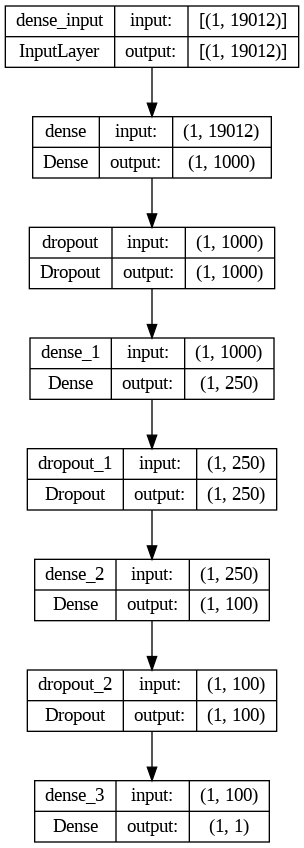

In [14]:
from tensorflow.keras.utils import plot_model

model(X_train[:1])  # Passing the first sample of x_train to build the model

# Now you can plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=early_stop,
)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.6220 - loss: 0.6295 - val_accuracy: 0.7433 - val_loss: 0.5222
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9145 - loss: 0.2249 - val_accuracy: 0.7230 - val_loss: 0.6462
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 45s 162ms/step - accuracy: 0.9777 - loss: 0.0637 - val_accuracy: 0.7392 - val_loss: 1.0087
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.9976 - loss: 0.0105 - val_accuracy: 0.7327 - val_loss: 1.3916
Epoch 4: early stopping


In [ ]:
from sklearn.metrics import average_precision_score, precision_score, recall_score, accuracy_score

# Make predictions on the test set
result = model.predict(X_test)

# For example, you might round probabilities to the nearest integer
y_pred_binary = [1 if p > 0.5 else 0 for p in result]

# Compute F1 score
F1_score = f1_score(y_test, y_pred_binary)

# Calculate average precision
average_precision = average_precision_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall_score = recall_score(y_test, y_pred_binary)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision))
print('Recall score: {0:0.3f}'.format(recall_score))
# print('Average precision-recall score: {0:0.3f}'.format(average_precision))
print('Accuracy score: {0:0.3f}'.format(accuracy))

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
F1 score: 0.735
Precision score: 0.728
Recall score: 0.743
Accuracy score: 0.733
